In [1]:
!pip install dateparser

     |████████████████████████████████| 358kB 2.8MB/s 


In [2]:
!pip install pyramid.arima

     |████████████████████████████████| 604kB 2.8MB/s 


In [3]:
!pip install pyramid

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 122kB 49.3MB/s 
     |████████████████████████████████| 235kB 50.4MB/s 


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [5]:
import numpy as np
import pandas as pd
from pandas import Series

import statistics as stat


# from sklearn import preprocessing
# from sklearn.preprocessing import SimpleImputer


import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import confusion_matrix, mean_squared_error
import math
from sklearn_pandas import DataFrameMapper, cross_val_score

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime, timedelta
from sklearn.feature_extraction.text import TfidfVectorizer

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

import dateparser
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("/content/drive/My Drive/Analytics vidhya timeseries jetrail/Train_SU63ISt.csv")


In [0]:
valid = pd.read_csv("/content/drive/My Drive/Analytics vidhya timeseries jetrail/Test_0qrQsBZ.csv")

In [0]:
train_original = train.copy()


In [0]:
valid_original = valid.copy()

In [0]:
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [0]:
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format = '%d-%m-%Y %H:%M')
train_original['hour'] = train_original['Datetime'].dt.hour

In [13]:
temp = train_original.groupby(['hour'])['ratio'].sum()
temp.head

<bound method NDFrame.head of hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: ratio, dtype: float64>

In [0]:
hratio = list(temp)

In [15]:
hratio

[0.04428658786604785,
 0.03534301407251346,
 0.029911075818115855,
 0.02471445334726865,
 0.0208022300695795,
 0.0186214272728632,
 0.020023090853141714,
 0.023221496687084307,
 0.026741002319316448,
 0.034555217753670826,
 0.049047207179413715,
 0.05437526020495297,
 0.054951351019531226,
 0.04860018589159891,
 0.05196543769916257,
 0.051309071935011934,
 0.04999948844394883,
 0.05116426222205783,
 0.052423477117310824,
 0.05562660500711063,
 0.05345524632210869,
 0.04989481620578086,
 0.05007582834697348,
 0.04889216634543572]

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


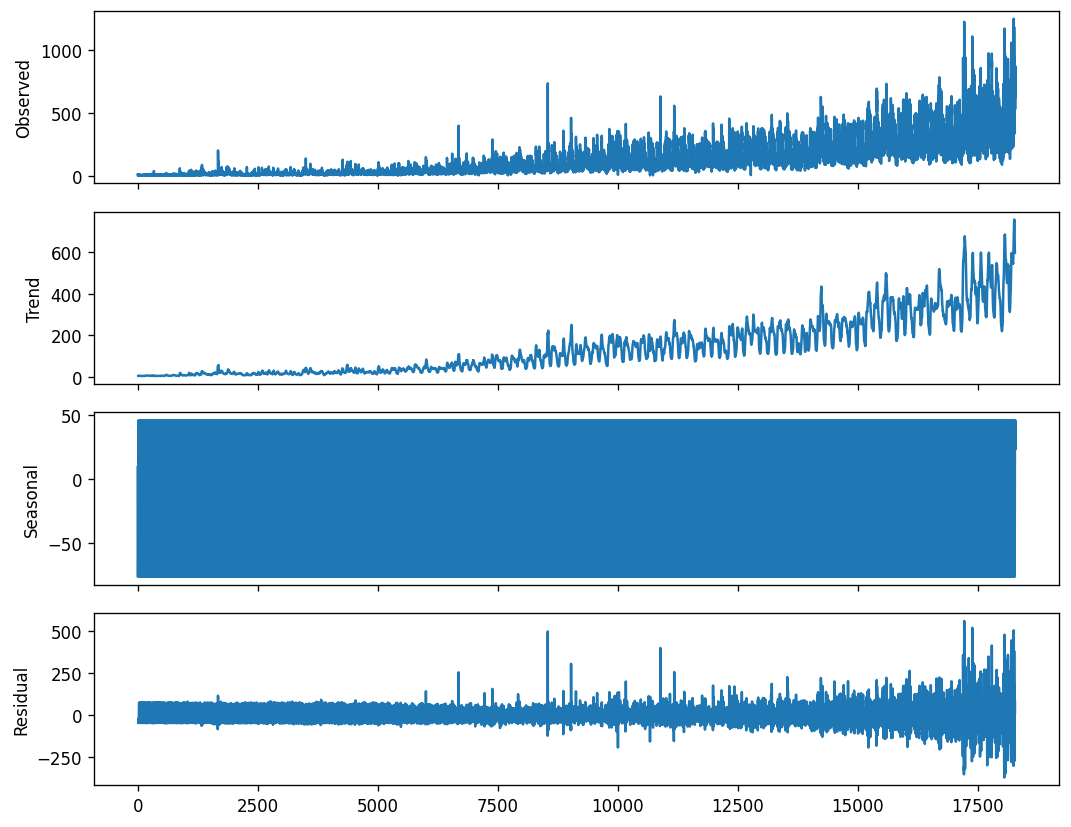

In [17]:
sm.tsa.seasonal_decompose(train.Count, freq=24).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [18]:
result

(-4.456560536856819,
 0.00023540466467665785,
 45,
 18242,
 {'1%': -3.430708525404171,
  '10%': -2.5668543412994906,
  '5%': -2.861698454786869},
 181026.8337109476)

In [0]:
train_sarima = train[:]
train_sarima['Datetime'] = pd.to_datetime(train_sarima['Datetime'],format = '%d-%m-%Y %H:%M')
train_sarima['date'] = train_sarima['Datetime'].dt.date
train_sarima = train_sarima.groupby(['date'])['Count'].sum().reset_index()
train_sarima['date'] = pd.to_datetime(train_sarima['date'])




In [0]:
train_sarima = train[:]
train_sarima['Datetime'] = pd.to_datetime(train_sarima['Datetime'],format = '%d-%m-%Y %H:%M')
train_sarima['date'] = train_sarima['Datetime'].dt.date
train_sarima = train_sarima.groupby(['date'])['Count'].sum().reset_index()
train_sarima['date'] = pd.to_datetime(train_sarima['date'])

In [23]:
train_sarima.head

<bound method NDFrame.head of           date  Count
0   2012-08-25     76
1   2012-08-26     88
2   2012-08-27     62
3   2012-08-28     58
4   2012-08-29     60
..         ...    ...
757 2014-09-21   9102
758 2014-09-22  14116
759 2014-09-23  13304
760 2014-09-24  16856
761 2014-09-25  14152

[762 rows x 2 columns]>

In [140]:
sarima = sm.tsa.statespace.SARIMAX(train_sarima.Count, order=(5,1,2), seasonal_order=(1,1,1,7))
sarima = sarima.fit()
print(sarima.summary())
sarima_preds_train = sarima.predict(start = 0, end= 761, dynamic= False)
sarima_preds_valid = sarima.predict(start = 762, end= 974, dynamic= True)


                                 Statespace Model Results                                
Dep. Variable:                             Count   No. Observations:                  762
Model:             SARIMAX(5, 1, 2)x(1, 1, 1, 7)   Log Likelihood               -6073.780
Date:                           Sun, 19 Apr 2020   AIC                          12167.560
Time:                                   19:38:55   BIC                          12213.814
Sample:                                        0   HQIC                         12185.379
                                           - 762                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2448      0.257      0.954      0.340      -0.258       0.748
ar.L2         -0.4923      0.145     -3.407

In [35]:
print('sarima_preds_train:') 
print(sarima_preds_train)
print('sarima_preds_valid:')
print(sarima_preds_valid)

sarima_preds_train:
0          0.000000
1         63.495372
2         75.142936
3         66.684547
4         59.984977
           ...     
757     7258.713840
758    13225.359666
759    14848.281075
760    13200.835359
761    14357.756131
Length: 762, dtype: float64
sarima_preds_valid:
762    12570.881559
763    10177.271420
764     9756.118728
765    13351.681003
766    15930.210020
           ...     
970    30777.686133
971    28923.494814
972    28905.511479
973    26033.221804
974    25687.363689
Length: 213, dtype: float64


In [0]:
er = []
for p in sarima_preds_valid:
    for l in range(len(hratio)):
        er.append(p*hratio[l])
d = {'Count': er}
sarimax_pred = pd.DataFrame(data=d)
sarimax_pred.to_csv("submussion_sarimax_512_1117.csv")

In [39]:
sarimax_pred

,Count
0,556.721451
1,444.292844
2,376.008591
3,310.682466
4,261.502370
...,...
5107,1428.900834
5108,1373.124353
5109,1281.666290
5110,1286.316015


In [42]:
from fbprophet import Prophet
train_fbprophet = train[:]
train_fbprophet['Datetime'] = pd.to_datetime(train_fbprophet['Datetime'],format = '%d-%m-%Y %H:%M')
train_fbprophet['date'] = train_fbprophet['Datetime'].dt.date
train_fbprophet = train_fbprophet.groupby(['date'])['Count'].sum().reset_index()
train_fbprophet.columns = ['ds', 'y']
train_fbprophet['y'] = np.log(train_fbprophet['y'])
fbprophet = Prophet()
fbprophet.add_seasonality(name='weekly', period=7, fourier_order=250)
fbprophet.fit(train_fbprophet)
future = fbprophet.make_future_dataframe(periods=213)
fbprophet_preds_valid= fbprophet.predict(future)

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


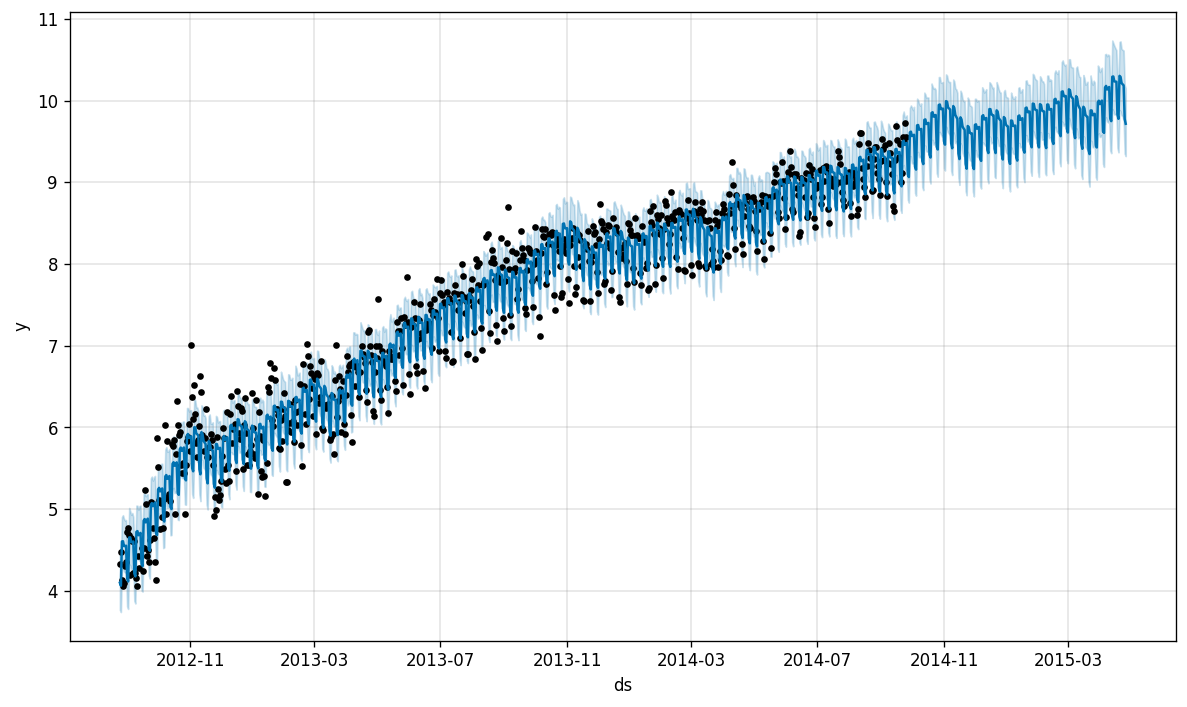

In [43]:
fig1 = fbprophet.plot(fbprophet_preds_valid)

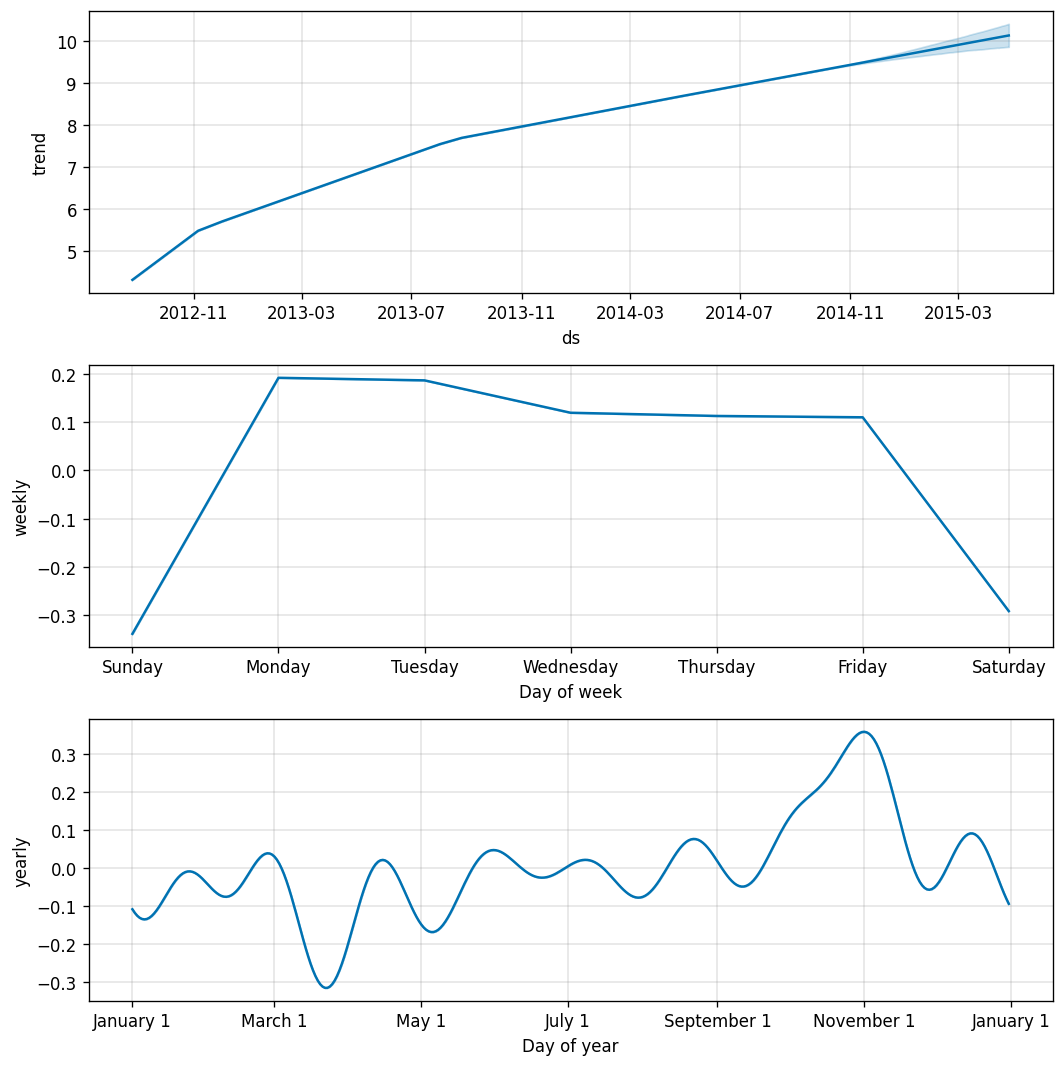

In [44]:
fig2 = fbprophet.plot_components(fbprophet_preds_valid)


In [0]:
fbprophet_preds_valid= np.exp(fbprophet_preds_valid[-213:]['yhat']).values
er = []
for p in range(len(fbprophet_preds_valid)):
    for l in range(len(hratio)):
        er.append(fbprophet_preds_valid[p]*hratio[l])
d = {'Count': er}
fbprophet_preds = pd.DataFrame(data=d)
fbprophet_preds.to_csv("submussion_fbprophet.csv")

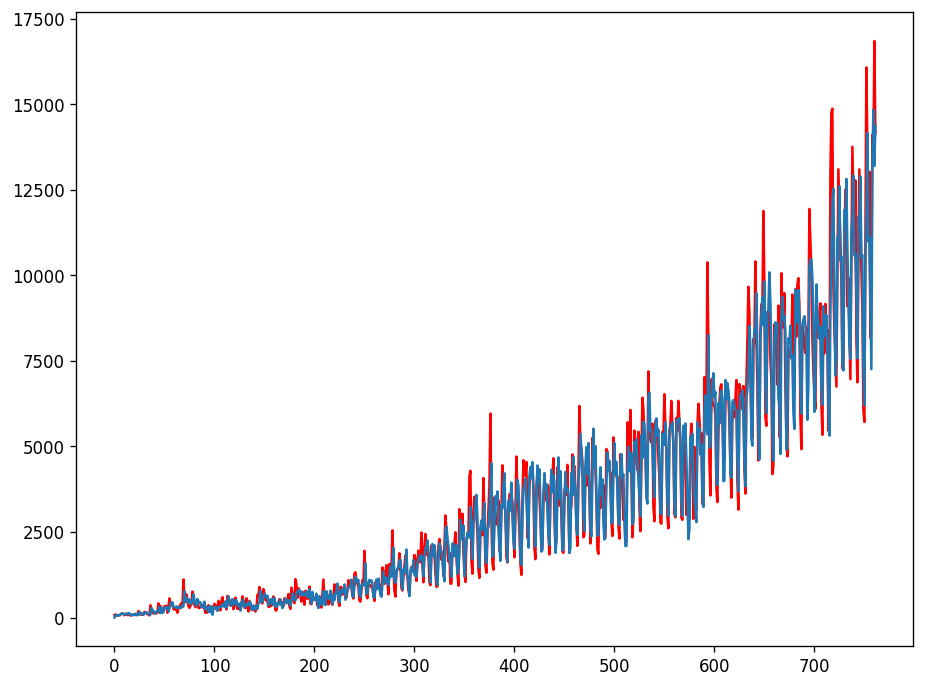

In [61]:
# comparing above two preds
preds_train = sarima_preds_train.reset_index(name="Count")
preds_valid = sarima_preds_valid.reset_index(name="Count")
plt.plot(range(0,len(preds_train)), train_sarima.Count, color='red')
plt.plot(range(0,len(preds_train)), preds_train.Count)

In [46]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format = '%d-%m-%Y %H:%M')
train['date'] = train['Datetime'].dt.date
train = train.groupby(['date'])['Count'].sum().reset_index()
train['date'] = pd.to_datetime(train['date'])
train['month'] = train.date.dt.month
train['day'] = train.date.dt.weekday
train['month_start'] = train.date.apply(lambda x: 1 if x.is_month_start else 0)
train['month_end'] = train.date.apply(lambda x: 1 if x.is_month_end else 0)
train['week_start'] = train.day.apply(lambda x: 1 if x == 0 or x ==1 else 0)
train['week_end'] = train.day.apply(lambda x: 1 if x == 5 or x ==6 else 0)
train['specialmonths'] = train.month.apply(lambda x: 1 if x == 7 or x ==8 else 0)
train['month_day'] = train.date.dt.day
train['predicted'] = sarima_preds_train
train['diff'] = train.date.apply(lambda x: (x - dateparser.parse('2012-08-25')).days)
train.head()

,date,Count,month,day,month_start,month_end,week_start,week_end,specialmonths,month_day,predicted,diff
0,2012-08-25,76,8,5,0,0,0,1,1,25,0.000000,0
1,2012-08-26,88,8,6,0,0,0,1,1,26,63.495372,1
2,2012-08-27,62,8,0,0,0,1,0,1,27,75.142936,2
3,2012-08-28,58,8,1,0,0,1,0,1,28,66.684547,3
4,2012-08-29,60,8,2,0,0,0,0,1,29,59.984977,4


In [100]:
train.head

<bound method NDFrame.head of           date  Count  month  day  ...  specialmonths  month_day     predicted  diff
0   2012-08-25     76      8    5  ...              1         25      0.000000     0
1   2012-08-26     88      8    6  ...              1         26     63.495372     1
2   2012-08-27     62      8    0  ...              1         27     75.142936     2
3   2012-08-28     58      8    1  ...              1         28     66.684547     3
4   2012-08-29     60      8    2  ...              1         29     59.984977     4
..         ...    ...    ...  ...  ...            ...        ...           ...   ...
757 2014-09-21   9102      9    6  ...              0         21   7258.713840   757
758 2014-09-22  14116      9    0  ...              0         22  13225.359666   758
759 2014-09-23  13304      9    1  ...              0         23  14848.281075   759
760 2014-09-24  16856      9    2  ...              0         24  13200.835359   760
761 2014-09-25  14152      9    3  

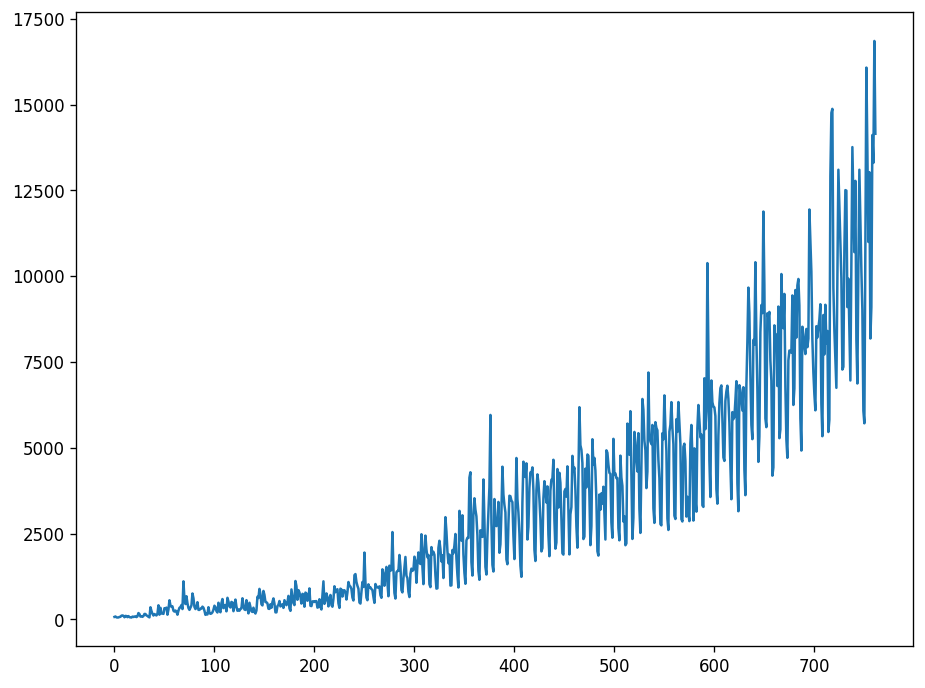

In [48]:
dateg = train.groupby(['date'])['Count'].sum().reset_index()
dateg = train.set_index('date')

plt.plot(train.index, train.Count)

In [52]:
sarimax_pred.index

RangeIndex(start=0, stop=5112, step=1)

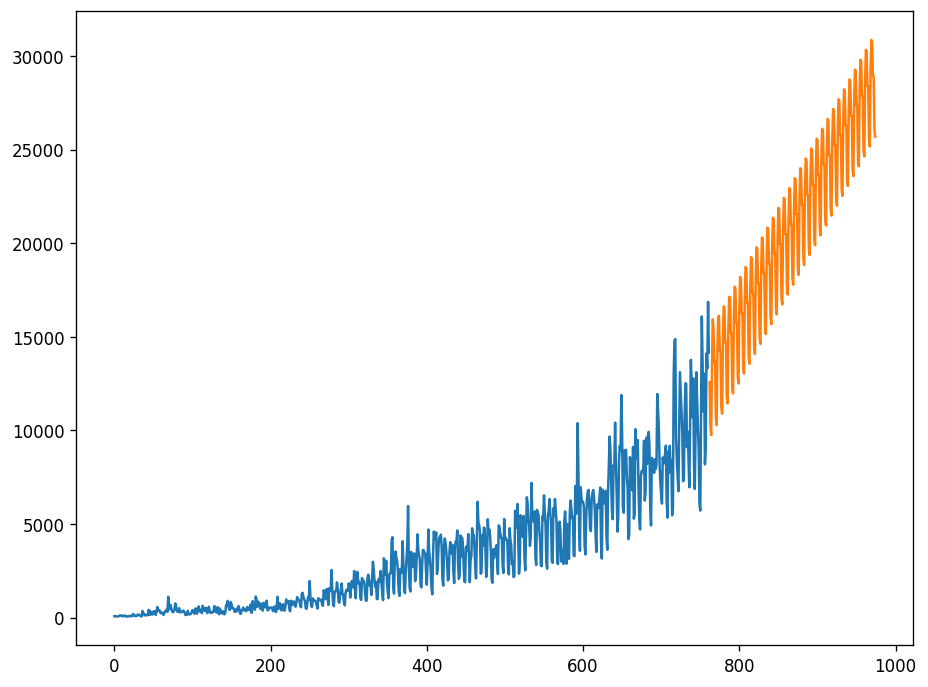

In [54]:
plt.plot(train.index, train.Count)
plt.plot(sarima_preds_valid.index, sarima_preds_valid)

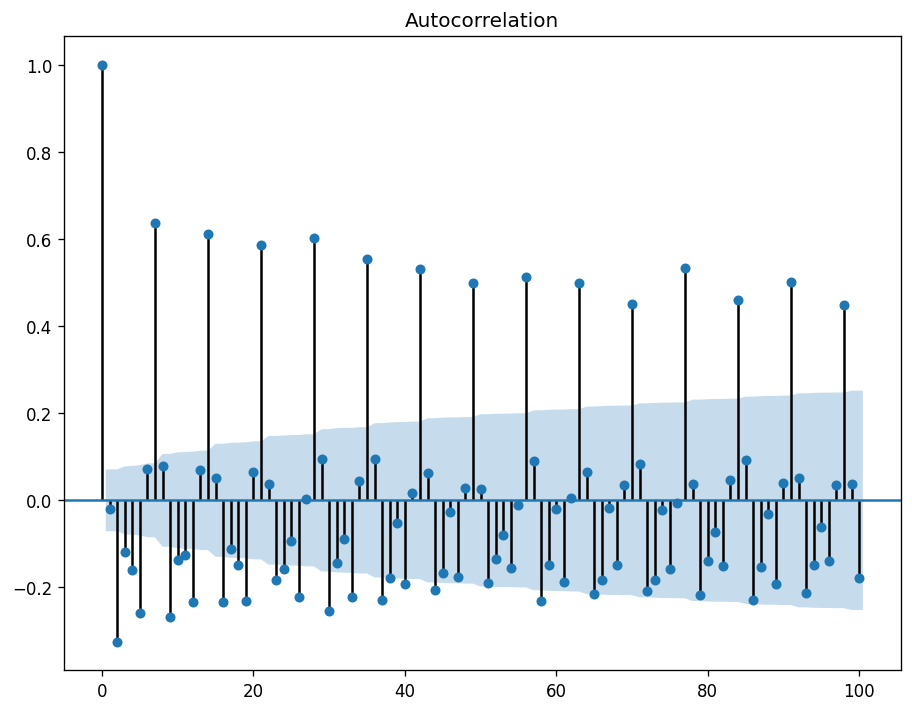

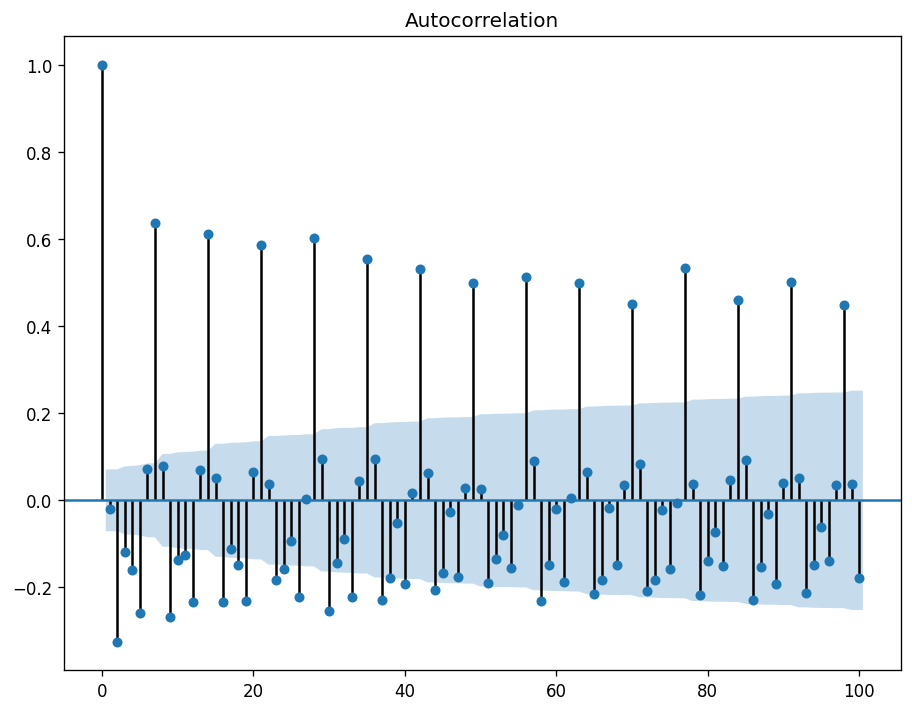

In [63]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plot_acf(train.Count.diff().dropna(), lags = 100)

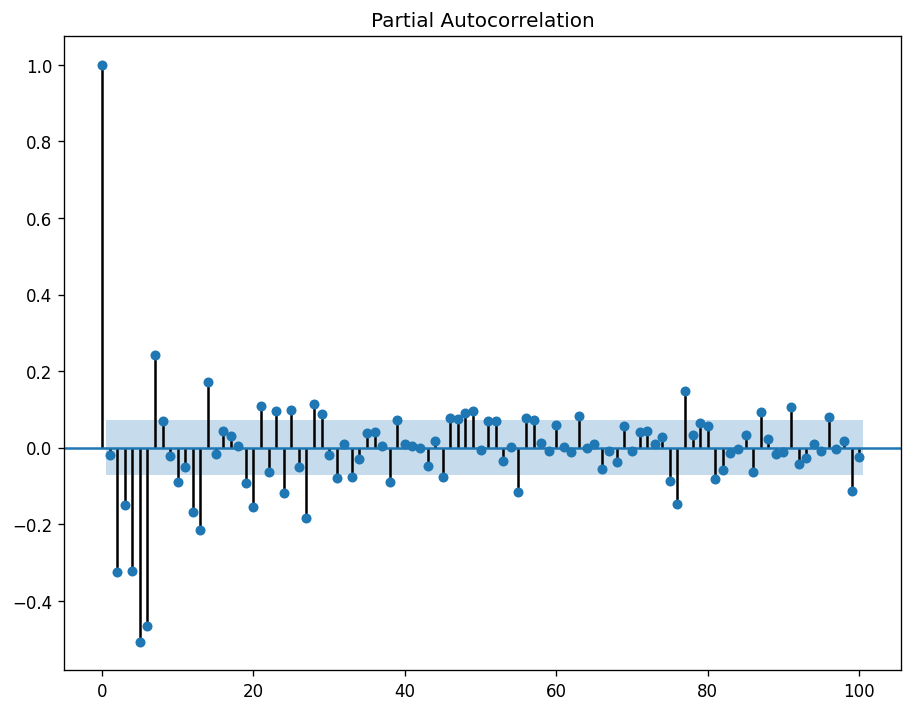

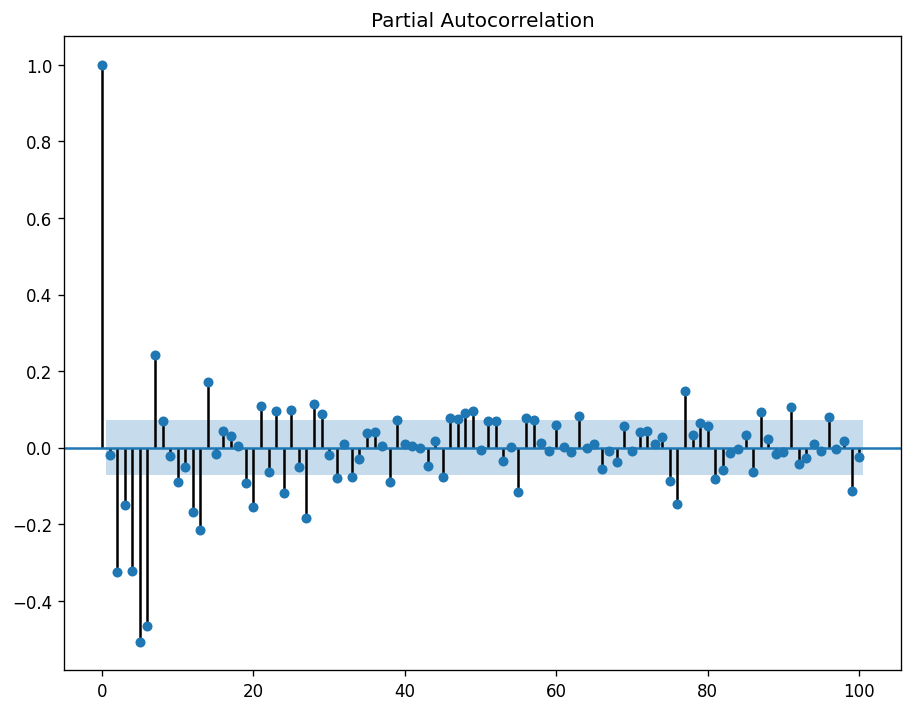

In [64]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plot_pacf(train.Count.diff().dropna(), lags = 100)

In [0]:
sarima_preds_valid1 = pd.DataFrame(sarima_preds_valid)
sarima_preds_valid1.index = valid.index

In [146]:
valid['Datetime'] = pd.to_datetime(valid['Datetime'],format = '%d-%m-%Y %H:%M')
valid['date'] = valid['Datetime'].dt.date
valid = valid.groupby(['date']).sum().reset_index()
valid['date'] = pd.to_datetime(valid['date'])
valid['month'] = valid.date.dt.month
valid['day'] = valid.date.dt.weekday
valid['month_start'] = valid.date.apply(lambda x: 1 if x.is_month_start else 0)
valid['month_end'] = valid.date.apply(lambda x: 1 if x.is_month_end else 0)
valid['week_start'] = valid.day.apply(lambda x: 1 if x == 0 or x ==1 else 0)
valid['week_end'] = valid.day.apply(lambda x: 1 if x == 5 or x ==6 else 0)
valid['specialmonths'] = valid.month.apply(lambda x: 1 if x == 7 or x ==8 else 0)
valid['month_day'] = valid.date.dt.day
valid['predicted'] = sarima_preds_valid1
valid['diff'] = valid.date.apply(lambda x: (x - dateparser.parse('2012-08-25')).days)
# valid['hour'] = valid.Datetime.dt.hour
valid.head()

,date,ID,month,day,month_start,month_end,week_start,week_end,specialmonths,month_day,predicted,diff
0,2014-09-26,439188,9,4,0,0,0,0,0,26,12570.881559,762
1,2014-09-27,439764,9,5,0,0,0,1,0,27,10177.271420,763
2,2014-09-28,440340,9,6,0,0,0,1,0,28,9756.118728,764
3,2014-09-29,440916,9,0,0,0,1,0,0,29,13351.681003,765
4,2014-09-30,441492,9,1,0,1,1,0,0,30,15930.210020,766


In [66]:
dfh = train.groupby(['date'])['Count'].sum().reset_index()
dfh.sort_values(['Count'], ascending=[False]).head(50)

,date,Count
760,2014-09-24,16856
752,2014-09-16,16080
718,2014-08-13,14878
717,2014-08-12,14762
761,2014-09-25,14152
758,2014-09-22,14116
738,2014-09-02,13764
753,2014-09-17,13676
759,2014-09-23,13304
724,2014-08-19,13104


In [0]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = 0#acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [147]:
new_df = train.drop(['date'], axis=1)
new_df.shape

(762, 11)

In [148]:
X_train = new_df[:]#[:700]
y_train = X_train['Count']
dropcols = ['Count']
X_train.drop(dropcols, axis=1,inplace=True)

X_test = new_df[700:]#[710:]
y_test = X_test['Count']
X_test.drop(dropcols, axis=1,inplace=True)

valid_df = valid.drop(["ID", "date"], axis=1)
valid_df

,month,day,month_start,month_end,week_start,week_end,specialmonths,month_day,predicted,diff
0,9,4,0,0,0,0,0,26,12570.881559,762
1,9,5,0,0,0,1,0,27,10177.271420,763
2,9,6,0,0,0,1,0,28,9756.118728,764
3,9,0,0,0,1,0,0,29,13351.681003,765
4,9,1,0,1,1,0,0,30,15930.210020,766
...,...,...,...,...,...,...,...,...,...,...
208,4,2,0,0,0,0,0,22,30777.686133,970
209,4,3,0,0,0,0,0,23,28923.494814,971
210,4,4,0,0,0,0,0,24,28905.511479,972
211,4,5,0,0,0,1,0,25,26033.221804,973


In [149]:
X_train

,month,day,month_start,month_end,week_start,week_end,specialmonths,month_day,predicted,diff
0,8,5,0,0,0,1,1,25,0.000000,0
1,8,6,0,0,0,1,1,26,63.495372,1
2,8,0,0,0,1,0,1,27,75.142936,2
3,8,1,0,0,1,0,1,28,66.684547,3
4,8,2,0,0,0,0,1,29,59.984977,4
...,...,...,...,...,...,...,...,...,...,...
757,9,6,0,0,0,1,0,21,7258.713840,757
758,9,0,0,0,1,0,0,22,13225.359666,758
759,9,1,0,0,1,0,0,23,14848.281075,759
760,9,2,0,0,0,0,0,24,13200.835359,760


In [150]:
y_test.head

<bound method NDFrame.head of 700     6562
701     6094
702     8546
703     8218
704     8498
       ...  
757     9102
758    14116
759    13304
760    16856
761    14152
Name: Count, Length: 62, dtype: int64>

In [73]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

linear1 = linear_model.LinearRegression()
linear1.fit(X_train,np.log(y_train))

lrp_train= linear.predict(X_train)
lrp1_train = np.exp(linear1.predict(X_train))
lrp_test= linear.predict(X_test)
lrp1_test = np.exp(linear1.predict(X_test))
new_lrp_train = (lrp_train + lrp1_train) / 2
new_lrp_test = (lrp_test + lrp1_test) / 2

# print(linear.score(X_test, y_test))
# print(forecast_accuracy(np.array(X_test['predicted']), np.array(y_test)))
print("linear_model.LinearRegression\n")
print("for train")
print(forecast_accuracy(np.array(lrp_train), np.array(y_train)))
print("for test")
print(forecast_accuracy(np.array(lrp_test), np.array(y_test)))
print("for train_log")
print(forecast_accuracy(np.array(lrp1_train), np.array(y_train)))
print("for test_log")
print(forecast_accuracy(np.array(lrp1_test), np.array(y_test)))
print("for train_both")
print(forecast_accuracy(np.array(new_lrp_train), np.array(y_train)))
print("for test_both")
print(forecast_accuracy(np.array(new_lrp_test), np.array(y_test)))

# print(forecast_accuracy(np.array(np.exp(rtp)), np.array(np.exp(y_test))))

#for c,cc in enumerate(linear.coef_):
    #print(X_train.columns[c])
    #print(cc)


linear_model.LinearRegression

for train
{'mape': 0.24383645462061673, 'me': 1.4084038688872118e-13, 'mae': 427.4558187351869, 'mpe': -0.023273013089797265, 'rmse': 695.1084153175949, 'acf1': 0, 'corr': 0.9769996566202058, 'minmax': 0.21380691419528697}
for test
{'mape': 0.10759732887368725, 'me': -143.92123972706128, 'mae': 1111.7687668475378, 'mpe': 0.006310332846242898, 'rmse': 1475.4361536823642, 'acf1': 0, 'corr': 0.8563704795829981, 'minmax': 0.10084641144148587}
for train_log
{'mape': 0.2935665219383947, 'me': 73.37154394443546, 'mae': 760.6077304894494, 'mpe': 0.07195531632333986, 'rmse': 1254.3930020607822, 'acf1': 0, 'corr': 0.9368420646027461, 'minmax': 0.21893545874252218}
for test_log
{'mape': 0.30172748845615754, 'me': 1340.6014577677315, 'mae': 2662.3496549503475, 'mpe': 0.20710250911395628, 'rmse': 3087.671238750821, 'acf1': 0, 'corr': 0.3509003185155895, 'minmax': 0.22038065518351735}
for train_both
{'mape': 0.21622396528612395, 'me': 36.68577197221782, 'mae': 492.3467

In [74]:
lrp1_train

array([  105.47708308,   102.85120484,   201.23586806,   197.63422374,
         190.74470829,   187.17895835,   188.87618882,   114.88859204,
         115.83665603,   227.28007901,   223.03761539,   215.6258854 ,
         210.90307916,   207.18844182,   122.30827114,   120.00066483,
         236.22891359,   231.8921074 ,   223.50665029,   219.04933072,
         215.39518503,   126.90677467,   124.75756043,   244.86187543,
         240.21208449,   229.85593879,   226.07721242,   222.65046499,
         131.36174284,   129.41513464,   252.51190435,   247.12595811,
         238.18245783,   234.62725026,   230.5938479 ,   136.32953012,
         138.06194945,   272.16058337,   276.82719566,   267.0302989 ,
         264.18542087,   258.74477978,   152.37954789,   149.43339052,
         292.30752322,   283.65225578,   278.37240121,   268.82372756,
         268.14522752,   157.38372326,   153.55400787,   299.83370642,
         294.27714501,   283.7108105 ,   282.01300152,   274.2282862 ,
      

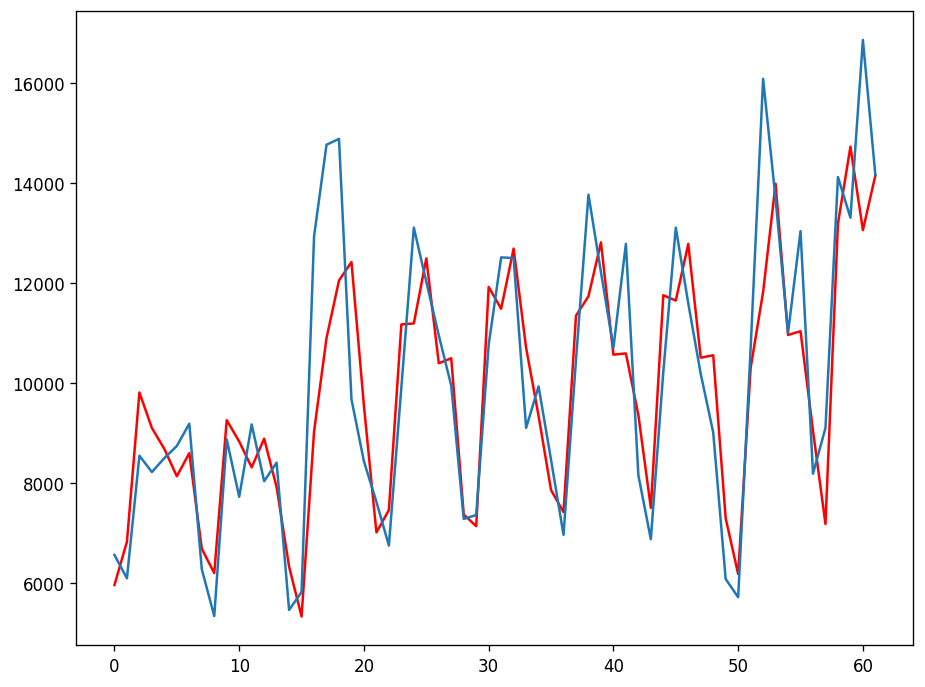

In [78]:
plt.plot(range(0,len(lrp_test)), lrp_test,color='red')
plt.plot(range(0,len(lrp_test)), y_test)

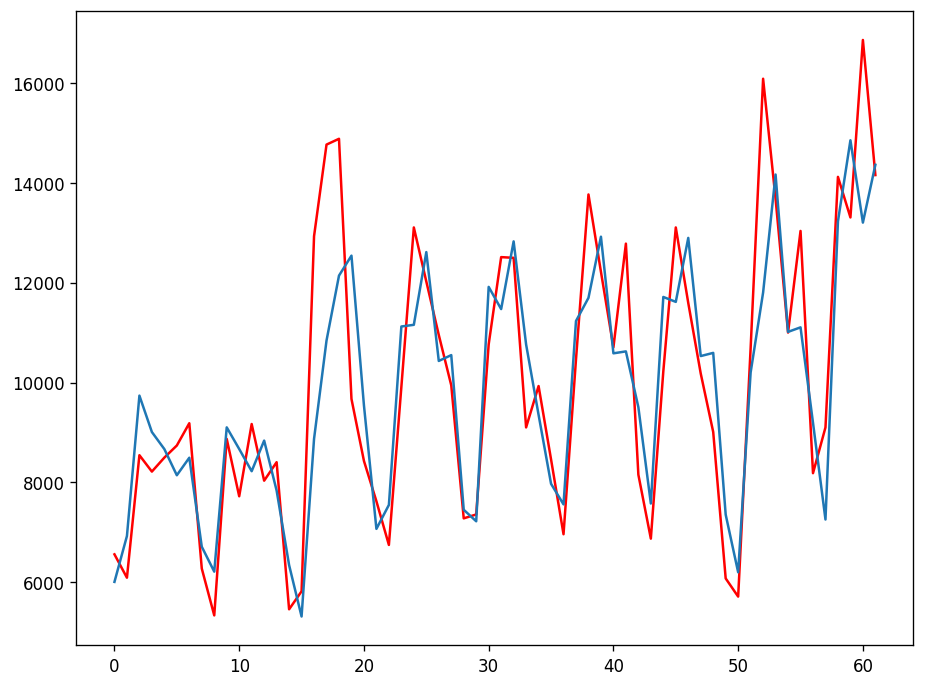

In [82]:
sarima_preds_train1 = pd.DataFrame(sarima_preds_train)
plt.plot(range(0,len(sarima_preds_train1 [700:])), train_sarima[700:].Count,color='red')
plt.plot(range(0,len(sarima_preds_train1 [700:])), sarima_preds_train1 [700:])

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestRegressor(random_state = 42)
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=12

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 20.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [84]:
rf_random.estimator
#RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      #max_depth=None, max_features='auto', max_leaf_nodes=None,
                      #max_samples=None, min_impurity_decrease=0.0,
                      #min_impurity_split=None, min_samples_leaf=1,
                      #min_samples_split=2, min_weight_fraction_leaf=0.0,
                      #n_estimators=100, n_jobs=None, oob_score=False,
                      #random_state=42, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [96]:
rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
rf_model = RandomForestRegressor(**rf_random.best_params_)
rf_model.fit(X_train,y_train)

rf_model1 = RandomForestRegressor(**rf_random.best_params_)
rf_model1.fit(X_train,np.log(y_train))

rfp_train= rf_model.predict(X_train)
rfp1_train = np.exp(rf_model1.predict(X_train))
rfp_test= rf_model.predict(X_test)
rfp1_test = np.exp(rf_model1.predict(X_test))
new_rfp_train = (rfp_train + rfp1_train) / 2
new_rfp_test = (rfp_test + rfp1_test) / 2

# print(linear.score(X_test, y_test))
# print(forecast_accuracy(np.array(X_test['predicted']), np.array(y_test)))
print("rf_model.RandomForestRegressor\n")
print("for train")
print(forecast_accuracy(np.array(rfp_train), np.array(y_train)))
print("for test")
print(forecast_accuracy(np.array(rfp_test), np.array(y_test)))
print("for train_log")
print(forecast_accuracy(np.array(rfp1_train), np.array(y_train)))
print("for test_log")
print(forecast_accuracy(np.array(rfp1_test), np.array(y_test)))
print("for train_both")
print(forecast_accuracy(np.array(new_rfp_train), np.array(y_train)))
print("for test_both")
print(forecast_accuracy(np.array(new_rfp_test), np.array(y_test)))

# print(forecast_accuracy(np.array(np.exp(rtp)), np.array(np.exp(y_test))))

#for c,cc in enumerate(linear.coef_):
    #print(X_train.columns[c])
    #print(cc)


rf_model.RandomForestRegressor

for train
{'mape': 0.113777819760381, 'me': 6.699048611117184, 'mae': 267.46357541174785, 'mpe': 0.036461502024630214, 'rmse': 452.7330399441678, 'acf1': 0, 'corr': 0.9903358387423827, 'minmax': 0.09890521418403486}
for test
{'mape': 0.07034564187301318, 'me': 16.364738133587384, 'mae': 722.6500570664139, 'mpe': 0.014069369030400439, 'rmse': 986.5373185506995, 'acf1': 0, 'corr': 0.9395532039356705, 'minmax': 0.0661069829008667}
for train_log
{'mape': 0.1062644912565354, 'me': -35.68047522009494, 'mae': 267.5202343202214, 'mpe': 0.010404012428501044, 'rmse': 465.66222658012407, 'acf1': 0, 'corr': 0.9899081008504613, 'minmax': 0.09669763485435201}
for test_log
{'mape': 0.06903424686804178, 'me': -80.98260463987022, 'mae': 722.2400947214816, 'mpe': 0.004685734336533134, 'rmse': 998.3670160112666, 'acf1': 0, 'corr': 0.9394920933557298, 'minmax': 0.06563638829810092}
for train_both
{'mape': 0.10962638993504725, 'me': -14.490713304488866, 'mae': 267.0047932277

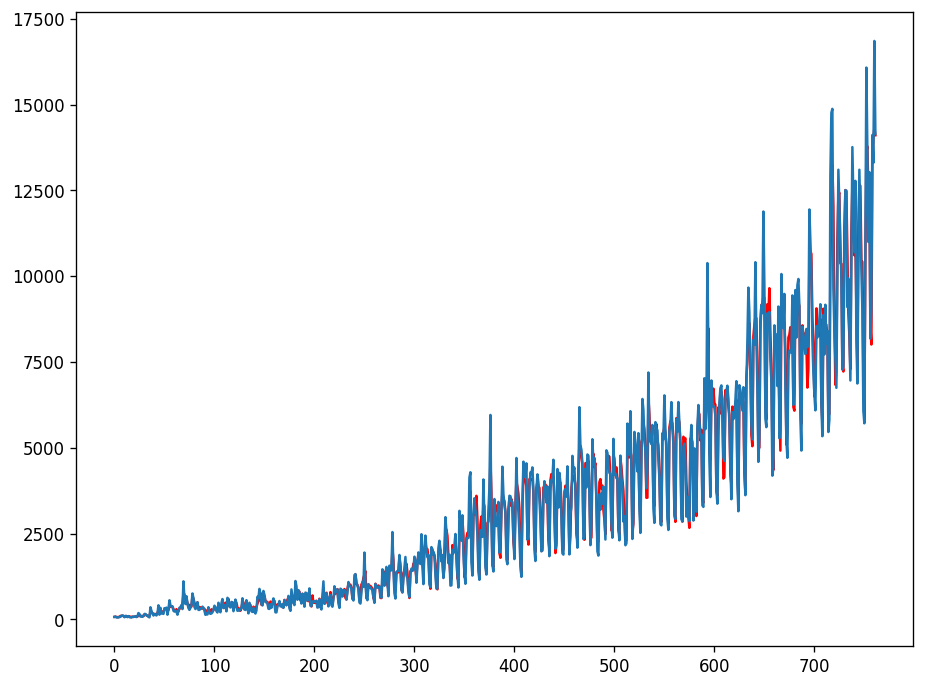

In [88]:
plt.plot(range(0,len(rfp_train)), rfp_train,color='red')
plt.plot(range(0,len(rfp_train)), y_train)

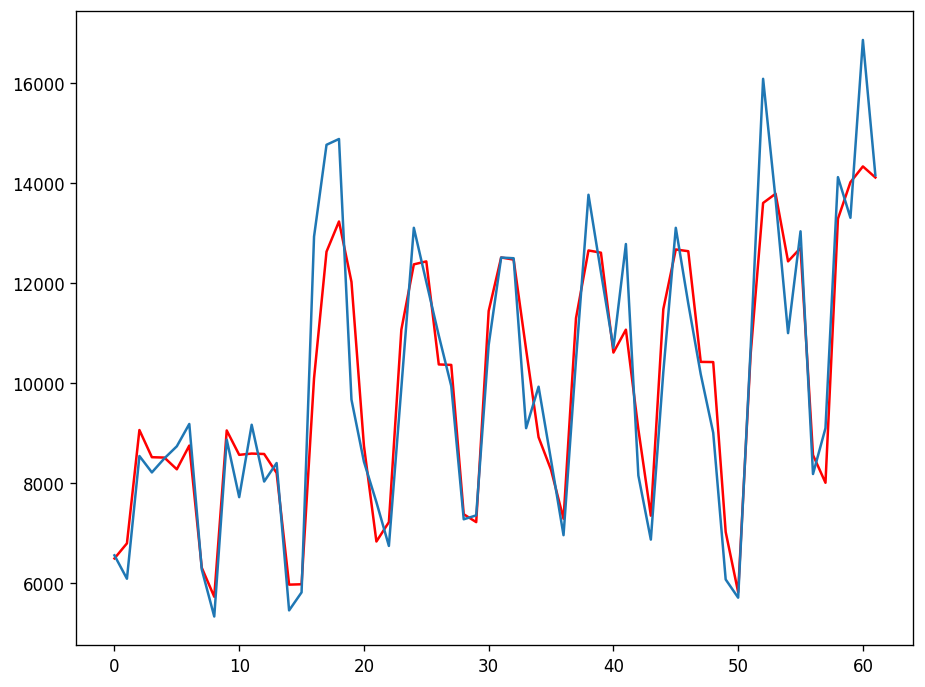

In [89]:
plt.plot(range(0,len(rfp_test)), rfp_test,color='red')
plt.plot(range(0,len(rfp_test)), y_test)

In [160]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          213 non-null    int64  
 1   day            213 non-null    int64  
 2   month_start    213 non-null    int64  
 3   month_end      213 non-null    int64  
 4   week_start     213 non-null    int64  
 5   week_end       213 non-null    int64  
 6   specialmonths  213 non-null    int64  
 7   month_day      213 non-null    int64  
 8   predicted      213 non-null    float64
 9   diff           213 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 16.8 KB


In [0]:
rfp_valid = rf_model.predict(valid_df)
rfp_valid1 = np.exp(rf_model1.predict(valid_df))

In [162]:
rfp_valid

array([13765.83578972, 11070.02544379,  8969.8073893 , 13786.45919932,
       14355.50758085, 14304.95514055, 14122.48438872, 14132.05438872,
       12332.98957836, 11431.61162247, 13781.92278383, 14412.86444152,
       14348.23206363, 14145.44874478, 14145.44874478, 13398.40207473,
       13173.7124299 , 13829.96975894, 14466.41491662, 14401.78253874,
       14177.18544987, 14177.18544987, 13696.40483472, 13583.53828833,
       13830.65418625, 14447.80640111, 14383.17402323, 14170.10700237,
       14180.08311348, 13781.21463587, 13727.06263614, 13820.40971402,
       14355.50758085, 14294.75431011, 14092.49370592, 14092.49370592,
       13704.56482649, 13730.59732649, 13781.92278383, 14413.92444152,
       14349.29206363, 14132.05438872, 14130.99438872, 14108.12738872,
       13828.00778713, 13802.31563989, 14444.99165472, 14401.78253874,
       14171.31550669, 14171.31550669, 14171.31550669, 14167.61544987,
       13835.83970212, 14457.70489949, 14383.17402323, 14159.45533571,
      

In [152]:
rfp_valid1

array([13413.30556148, 11040.35246214,  8741.51549916, 13508.92950218,
       14216.2646079 , 14191.18710526, 13793.30869873, 13798.38558484,
       11946.70172201, 11405.83115287, 13508.3921863 , 14273.02933091,
       14217.67855778, 13809.75272839, 13809.75272839, 13141.01833631,
       12804.35513912, 13542.90612096, 14330.74914192, 14275.17453151,
       13864.23702496, 13865.44106078, 13420.39874718, 13362.55614926,
       13573.02870358, 14339.96161659, 14284.35128022, 13850.06316456,
       13859.95061163, 13436.3988405 , 13413.79920596, 13557.96756452,
       14216.2646079 , 14166.80295587, 13751.4359549 , 13751.4359549 ,
       13395.25594289, 13411.08229151, 13508.3921863 , 14273.02933091,
       14217.67855778, 13798.38558484, 13798.38558484, 13777.79545473,
       13444.98797755, 13519.52043259, 14298.17198154, 14271.28192081,
       13843.23372412, 13847.00958111, 13847.00958111, 13859.13590991,
       13568.52816295, 14324.7618695 , 14284.35128022, 13859.75608614,
      

In [0]:
new_rfp_valid2 = (rfp_valid +rfp_valid1)/2

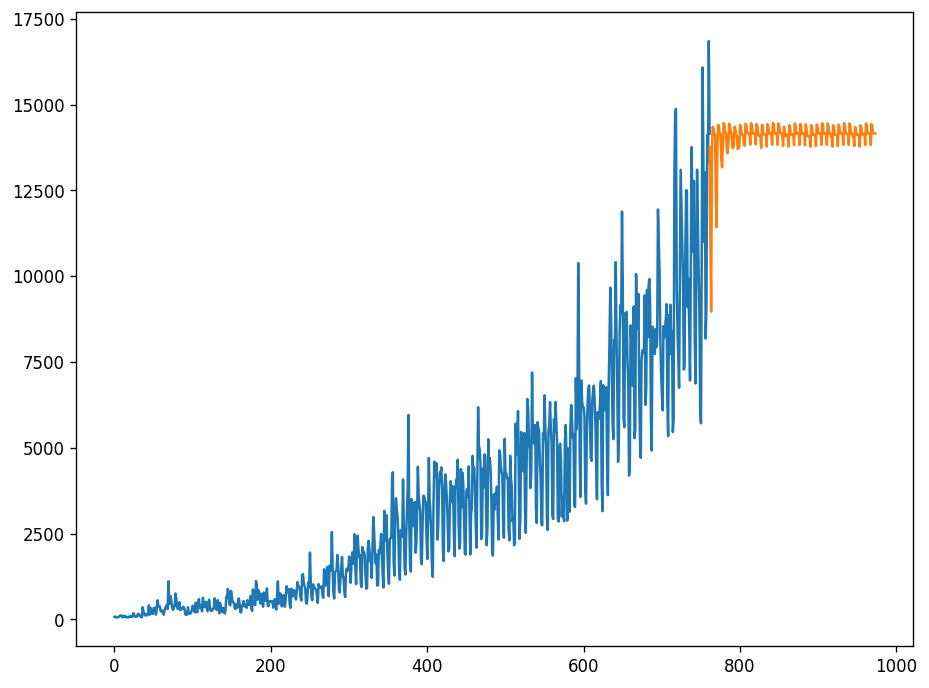

In [154]:
plt.plot(train.index, train.Count)
plt.plot(valid_df.index+761, rfp_valid)

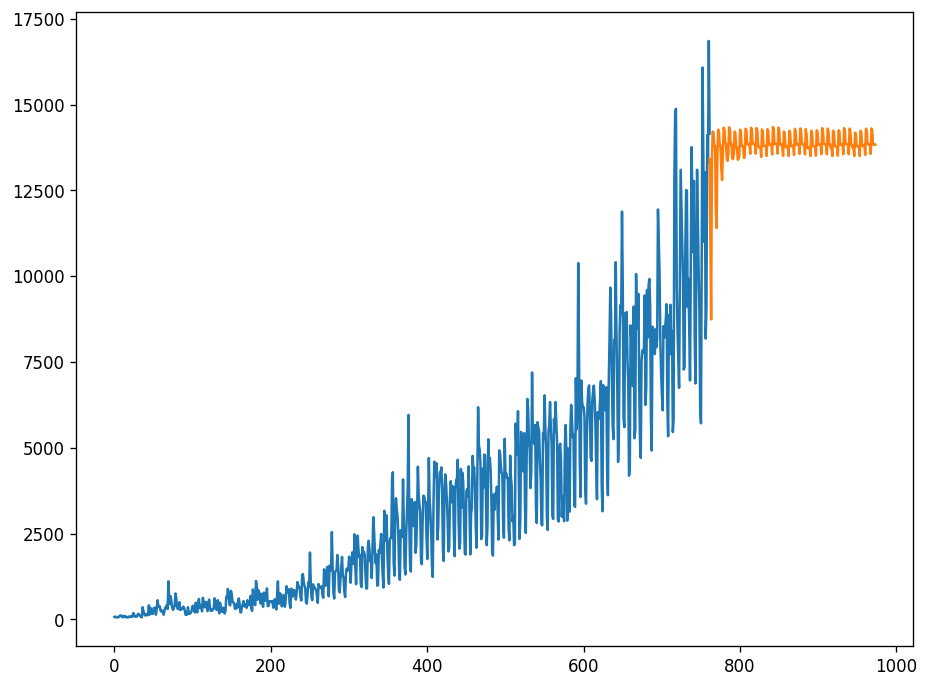

In [155]:
plt.plot(train.index, train.Count)
plt.plot(valid_df.index+761, rfp_valid1)

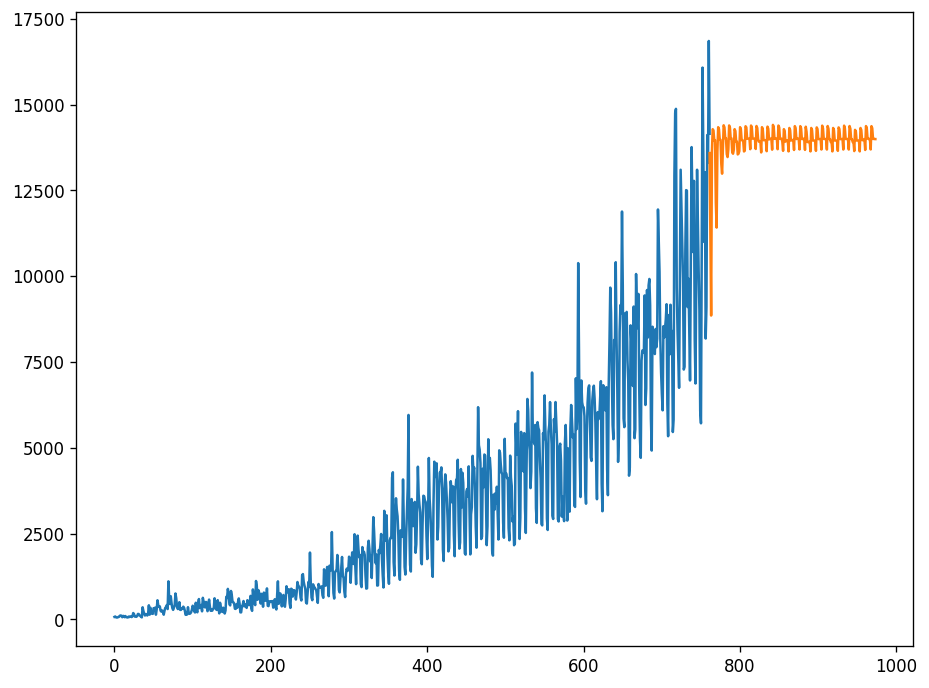

In [156]:
plt.plot(train.index, train.Count)
plt.plot(valid_df.index+761, new_rfp_valid2)

In [157]:
new_rfp_valid2

array([13589.5706756 , 11055.18895296,  8855.66144423, 13647.69435075,
       14285.88609438, 14248.07112291, 13957.89654372, 13965.21998678,
       12139.84565019, 11418.72138767, 13645.15748506, 14342.94688621,
       14282.95531071, 13977.60073659, 13977.60073659, 13269.71020552,
       12989.03378451, 13686.43793995, 14398.58202927, 14338.47853512,
       14020.71123741, 14021.31325532, 13558.40179095, 13473.04721879,
       13701.84144491, 14393.88400885, 14333.76265172, 14010.08508346,
       14020.01686256, 13608.80673819, 13570.43092105, 13689.18863927,
       14285.88609438, 14230.77863299, 13921.96483041, 13921.96483041,
       13549.91038469, 13570.839809  , 13645.15748506, 14343.47688621,
       14283.48531071, 13965.21998678, 13964.68998678, 13942.96142173,
       13636.49788234, 13660.91803624, 14371.58181813, 14336.53222978,
       14007.2746154 , 14009.1625439 , 14009.1625439 , 14013.37567989,
       13702.18393253, 14391.23338449, 14333.76265172, 14009.60571092,
      

In [0]:
er = []
for p in range(len(new_rfp_valid2)):
    #print(p)
    for l in range(len(hratio)):
        #print(l)
        er.append(new_rfp_valid2[p]*hratio[l])
d = {'Count': er}
predf = pd.DataFrame(data=d)
predf.to_csv("submission_new_rfp_valid2_withpreds.csv")


In [0]:
er = []
for p in range(len(rfp_valid)):
    #print(p)
    for l in range(len(hratio)):
        #print(l)
        er.append(rfp_valid[p]*hratio[l])
d = {'Count': er}
predf = pd.DataFrame(data=d)
predf.to_csv("submission_rfp_valid_withpreds.csv")

In [163]:
xgboost_model = xgb.XGBRegressor(random_state = 42)

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
  'learning_rate'   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
  'min_child_weight' : [ 1, 3, 5, 7 ],
  'gamma'           : [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
  'objective' : ['reg:linear', 'reg:squarederror', 'reg:squaredlogerror'],
  'booster' : ['gbtree' , 'gblinear'], 
  'lambda' :[1,1.5] ,
  'alpha' : [0, 0.1, 0.01] 
   }  

xgboost = RandomizedSearchCV(estimator = xgboost_model, param_distributions = random_grid, n_iter = 100,
                             cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgboost.fit(X_train,y_train)
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01 
[19:51:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01, total=   0.3s
[CV] objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01 
[19:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01, total=   0.2s
[CV] objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01 
[19:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lambda=1, gamma=0.1, bootstrap=False, booster=gblinear, alpha=0.01, total=   0.2s
[CV] objective=reg:linear, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, min_child_weight=3, max_features=auto, max_depth=50, learning_rate=0.3, lam

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                    

In [164]:
xgboost.estimator
#XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             #colsample_bynode=1, colsample_bytree=1, gamma=0,
             #importance_type='gain', learning_rate=0.1, max_delta_step=0,
             #max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             #n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             #reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             #silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xgboost = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [168]:
xgboost.fit(X_train,y_train)

xgboost1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgboost1.fit(X_train,np.log(y_train))

xgbp_train= xgboost.predict(X_train)
xgbp1_train = np.exp(xgboost1.predict(X_train))
xgbp_test= xgboost.predict(X_test)
xgbp1_test = np.exp(xgboost1.predict(X_test))
new_xgbp_train = (xgbp_train + xgbp1_train) / 2
new_xgbp_test = (xgbp_test + xgbp1_test) / 2

# print(linear.score(X_test, y_test))
# print(forecast_accuracy(np.array(X_test['predicted']), np.array(y_test)))
print("XGBRegressor\n")
print("for train")
print(forecast_accuracy(np.array(xgbp_train), np.array(y_train)))
print("for test")
print(forecast_accuracy(np.array(xgbp_test), np.array(y_test)))
print("for train_log")
print(forecast_accuracy(np.array(xgbp1_train), np.array(y_train)))
print("for test_log")
print(forecast_accuracy(np.array(xgbp1_test), np.array(y_test)))
print("for train_both")
print(forecast_accuracy(np.array(new_xgbp_train), np.array(y_train)))
print("for test_both")
print(forecast_accuracy(np.array(new_xgbp_test), np.array(y_test)))

# print(forecast_accuracy(np.array(np.exp(rtp)), np.array(np.exp(y_test))))

#for c,cc in enumerate(linear.coef_):
    #print(X_train.columns[c])
    #print(cc)


[20:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor

for train
{'mape': 0.18010920959917098, 'me': -1.1702138345072588, 'mae': 301.4085415817621, 'mpe': 0.08299383610053233, 'rmse': 470.6828534529053, 'acf1': 0, 'corr': 0.9895504205600351, 'minmax': 0.13633170838458852}
for test
{'mape': 0.05131657074883085, 'me': -22.372298702116936, 'mae': 491.39905966481854, 'mpe': 0.00494651291333409, 'rmse': 620.6412303179187, 'acf1': 0, 'corr': 0.9769283630154897, 'minmax': 0.04915656834278059}
for train_log
{'mape': 0.12583048226693697, 'me': -43.21235682770336, 'mae': 337.19990084991053, 'mpe': 0.013734612085622393, 'rmse': 581.0924456876576, 'acf1': 0, 'corr': 0.9841674002185063, 'minmax': 0.1135788401545661}
for test_log
{'mape': 0.07569357447634743, 'me': -146.18260143649192, 'mae

In [0]:
xgbp_valid = xgboost.predict(valid_df)
xgbp_valid1 = np.exp(xgboost1.predict(valid_df))

In [0]:
new_xgbp_valid2 = (xgbp_valid + xgbp_valid1)/2

In [0]:
er = []
for p in range(len(new_xgbp_valid2)):
    #print(p)
    for l in range(len(hratio)):
        #print(l)
        er.append(new_xgbp_valid2[p]*hratio[l])
d = {'Count': er}
predf = pd.DataFrame(data=d)
predf.to_csv("submission_new_xgbp_valid2_withpreds.csv")


In [0]:
er = []
for p in range(len(xgbp_valid)):
    #print(p)
    for l in range(len(hratio)):
        #print(l)
        er.append(xgbp_valid[p]*hratio[l])
d = {'Count': er}
predf = pd.DataFrame(data=d)
predf.to_csv("submission_xgbp_valid_withpreds.csv")

In [0]:
ensemble_preds = (a_preds + f_preds + linear_pred) / 3

In [0]:
plt.plot(X_train.index, y_train)
plt.plot(testing_df.index+761, ensemble_preds)

In [0]:
er = []
for p in range(len(ensemble_preds)):
    for l in range(len(hratio)):
        er.append(ensemble_preds[p]*hratio[l])
d = {'Count': er}
predf = pd.DataFrame(data=d)
predf.to_csv("submussion_test_ensemble.csv")